### Import Packages

In [96]:
# working with data
import numpy as np
import random

# working with files
import pickle as pkl
import os

# timing
import tqdm

# visualization
import matplotlib
import matplotlib.pyplot as plt

### Helpful Functions

In [99]:
def plot_partition(partition, ax=None, text=True, normalized=True, equal_axis=True):
    """ 
    Plots a partition.

    Parameters
    ----------
        partition: np.ndarray
            Partition to plot
        ax: matplotlib.axes.Axes
            Axis to plot partition on
        text: boolean
            Whether to label plot with number of total squares or not
        normalized: boolean
            Whether to scale plot or not
        equal_axis: boolean
            Whether to equate x and y scales or not

    Returns
    -------
        ax: matplotlib.axes.Axes
            Axis with plot of partition
    """

    if ax is None:
        _, ax = plt.subplots(figsize=(4,4))

    num_squares = len(partition)
    if normalized:
        ax.step(np.arange(num_squares)/np.sqrt(num_squares), partition/np.sqrt(num_squares), where='post')
    else:
        ax.step(np.arange(num_squares), partition, where='post')

    if text:
        prefix = 'Normalized ' if normalized else ''
        ax.set_title(prefix + rf'$n={num_squares}$')

    if equal_axis:
        plt.gca().set_aspect('equal')

    return ax

### Notion of Randomness: Gravity

In [26]:
# number of squares

def generate_gravity(n):
    """ 
    Generate a sample Young tableaux using notion of gravity to the x axis and the y axis
    
    Parameters
    ----------
        n: int
            Number of squares in the Young tableaux
    
    Returns
    -------
        gravity_y: np.ndarray
            Heights of stairsteps
    """

    samples = random.sample(list(range((n**2))), n)
    
    grid_np = np.zeros((n,n))
    for sample in samples:
        grid_np[sample//n][sample%n] = 1

    gravity_x = np.sum(grid_np, axis=0)
    gravity_y = np.sort(gravity_x)[::-1]

    return gravity_y

<AxesSubplot:title={'center':'Normalized $n=10000$'}>

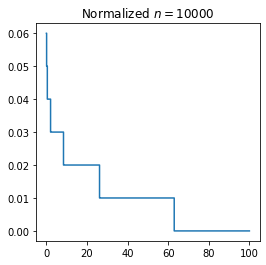

In [94]:
test_arr = generate_gravity(int(1e4))
plot_partition(test_arr)

### Notion of Randomness: Uniformly Random

In [95]:
def all_partitions(n, one_less=None):
    """ 
    Returns a list of all partitions of the integer n.

    Parameters
    ----------
        n: int
            Integer to be partitioned

    Returns
    -------
        partition_list: list
            Partitions
    """

    if n == 1:
        return [[1]]
    else:
        if one_less is None:
            one_less = all_partitions(n-1)
        one_less_extend = [less_partition + [0] for less_partition in one_less]
        partition_list = []

        for less_partition in one_less_extend:
            # add 1 to the highest number
            add_highest = less_partition.copy()
            add_highest[0] = add_highest[0] + 1

            partition_list.append(add_highest)

            # check if less_partition is of the format (m, m, ..., m, m-1, ...)
            max_val = np.max(less_partition)
            if max_val-1 in np.unique(less_partition):
                add_pos = np.min(np.argwhere(less_partition==(max_val-1))) # find where max_val-1 is
                one_step = less_partition.copy()
                one_step[add_pos] = one_step[add_pos] + 1
                
                partition_list.append(one_step)

    return partition_list

In [97]:
# make a database of partitions

if not os.path.exists("Partitions/partitions_to_49.pkl"):
    partition_db = dict()

    partition_db[1] = all_partitions(1)

    for val in tqdm.tqdm(range(2, 50)):
        partition_db[val] = all_partitions(val, one_less=partition_db[val-1])

    with open("Partitions/partitions_to_49.pkl", "wb") as f:
        pkl.dump(partition_db, f)
else:
    with open("Partitions/partitions_to_49.pkl", "rb") as f:
        partition_db = pkl.load(f)

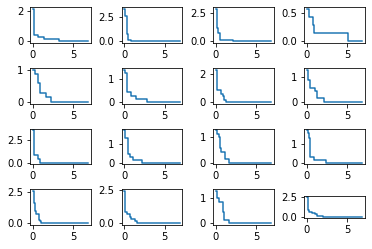

In [112]:
fig, axes = plt.subplots(4, 4, gridspec_kw={'hspace': 0.7, 'wspace': 0.5})

for idx in range(axes.flatten().shape[0]):
    plot_partition(random.choice(partition_db[49]), text=False, ax=axes[idx//4][idx%4])